In [1]:
# 绘图模块
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

def plot_predict(x, w, b):
        return np.dot(w, x) + b

def plot_decsion_plane(X_data, y_data, w, b):
    # 画决策面
    colors = ['red', 'blue']
    cmap = ListedColormap(colors[:len(np.unique(y_data))])
    x1_min, x1_max = X_data[:, 0].min() - 1, X_data[:, 0].max() + 1
    x2_min, x2_max = X_data[:, 1].min() - 1, X_data[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),np.arange(x2_min, x2_max, 0.02))
    Z = plot_predict(np.array([xx1.ravel(), xx2.ravel()]), w, b)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 画样本点
    markers = ('x', 'o')
    for idx, ci in enumerate(np.unique(y_data)):
        plt.scatter(x=X_data[y_data == ci, 0], y=X_data[y_data == ci, 1], alpha=0.8, c=np.atleast_2d(cmap(idx)), 
                    marker=markers[idx], label=ci)

    # 画图例
    plt.legend(loc='upper left')
    plt.show()

In [2]:
# 定义训练数据
X = np.array([[3,3],
              [4,3],
              [1,1]])
y = np.array([1, 1, -1])

In [3]:
from sklearn.linear_model import Perceptron

In [4]:
# 实例化模型
clf = Perceptron(verbose=2)
# 训练模型
clf.fit(X, y)

-- Epoch 1
Norm: 3.61, NNZs: 2, Bias: 0.000000, T: 3, Avg. loss: 2.666667
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.24, NNZs: 2, Bias: -1.000000, T: 6, Avg. loss: 1.666667
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -2.000000, T: 9, Avg. loss: 0.666667
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -2.000000, T: 12, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -2.000000, T: 15, Avg. loss: 0.000000
Total training time: 0.00 seconds.


/Users/yufei/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=2, warm_start=False)

In [5]:
# 打印系数矩阵
print("w=", clf.coef_)
# 打印截距
print("b=", clf.intercept_)

w= [[1. 0.]]
b= [-2.]


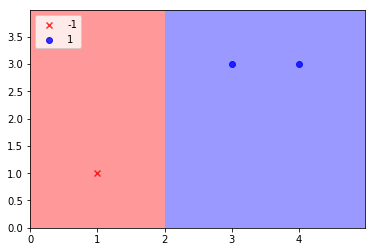

In [6]:
# 画决策面
plot_decsion_plane(X, y, clf.coef_, clf.intercept_)